# Bayesian Network Construction

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 3.1

Draw a causal graph for each of the following problems:
1.	The province of origin and the profession are two of the risk factors for brucellosis. One of the symptoms of this disease is fever. The two most common tests to diagnose this disease are blood cultures and serology.


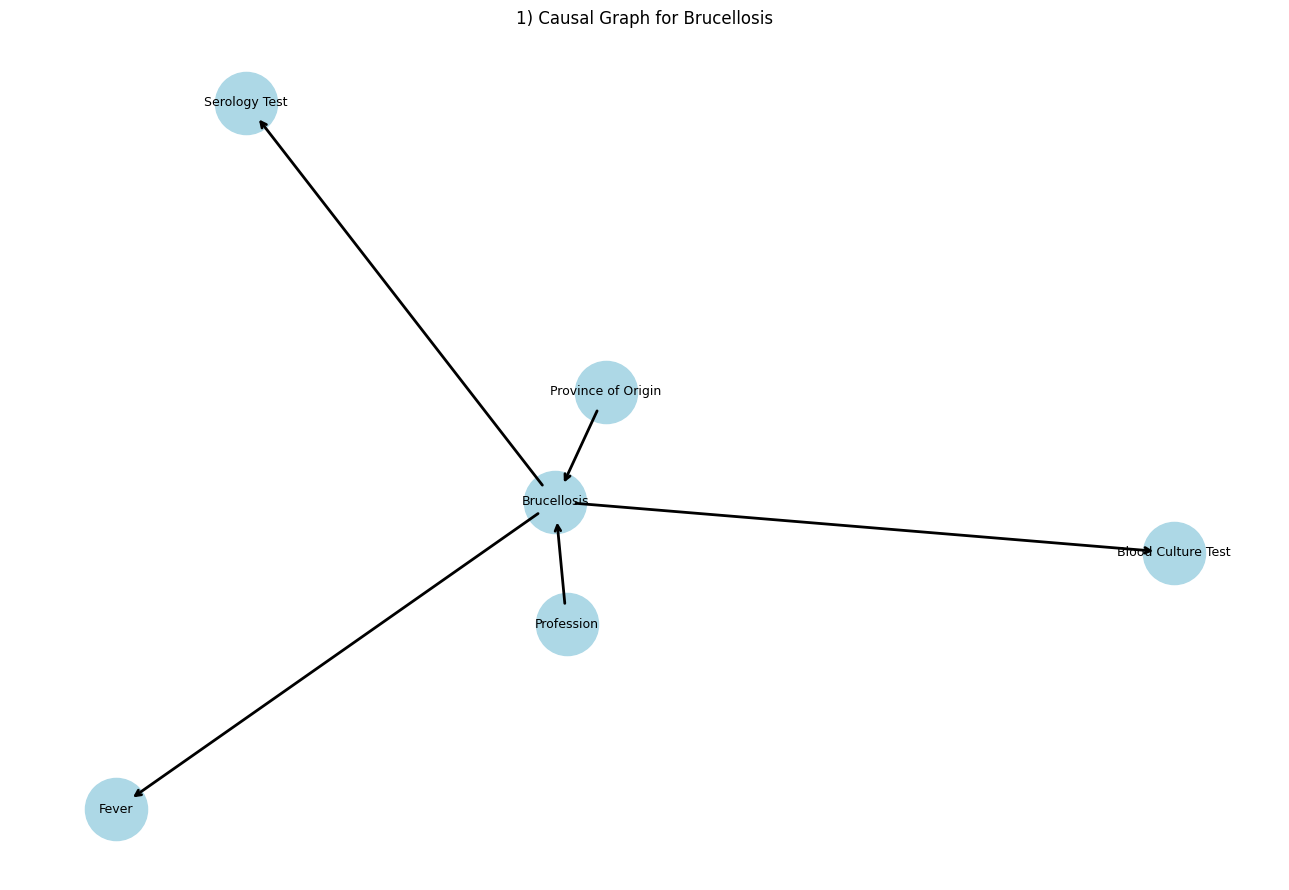

In [26]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["Province of Origin", "Profession", "Brucellosis", "Fever", "Blood Culture Test", "Serology Test"]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Province of Origin", "Brucellosis"),
    ("Profession", "Brucellosis"),
    ("Brucellosis", "Fever"),
    ("Brucellosis", "Blood Culture Test"),
    ("Brucellosis", "Serology Test")
]
G.add_edges_from(edges)

# Set up plot
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9)

# Draw arrows with annotations to shrink arrow heads away from nodes
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=15, shrinkB=15),
    )

plt.title("1) Causal Graph for Brucellosis")
plt.margins(0.1)
plt.axis('off')
plt.tight_layout()
plt.show()


2.	Gout is a disease that mainly affects adult males. Almost all people with it have a history of hyperuricemia, but only 5% of patients with hyperuricemia develop gout. The first manifestation of acute gout is extraordinarily painful arthritis. Half of the uric acid stones found are also due to this disease.

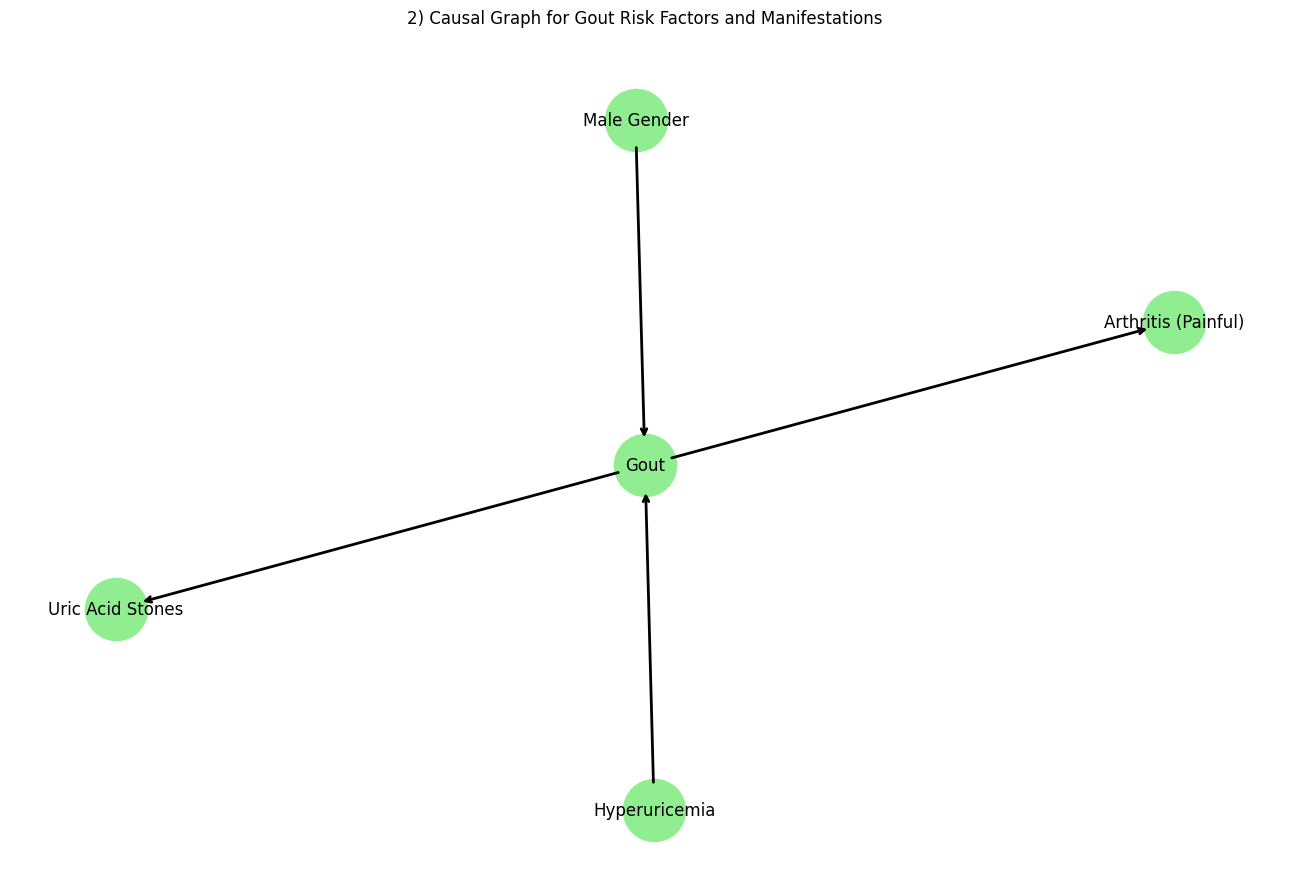

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Male Gender",
    "Hyperuricemia",
    "Gout",
    "Arthritis (Painful)",
    "Uric Acid Stones"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Male Gender", "Gout"),
    ("Hyperuricemia", "Gout"),
    ("Gout", "Arthritis (Painful)"),
    ("Gout", "Uric Acid Stones")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=24)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightgreen")
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=20, shrinkB=20),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("2) Causal Graph for Gout Risk Factors and Manifestations", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


3. Metastatic cancer can cause serum-calcium elevation and is, in turn, one of the possible causes of brain tumor. Both elevated serum calcium and brain tumor can produce coma. The brain tumor can also produce severe headaches.

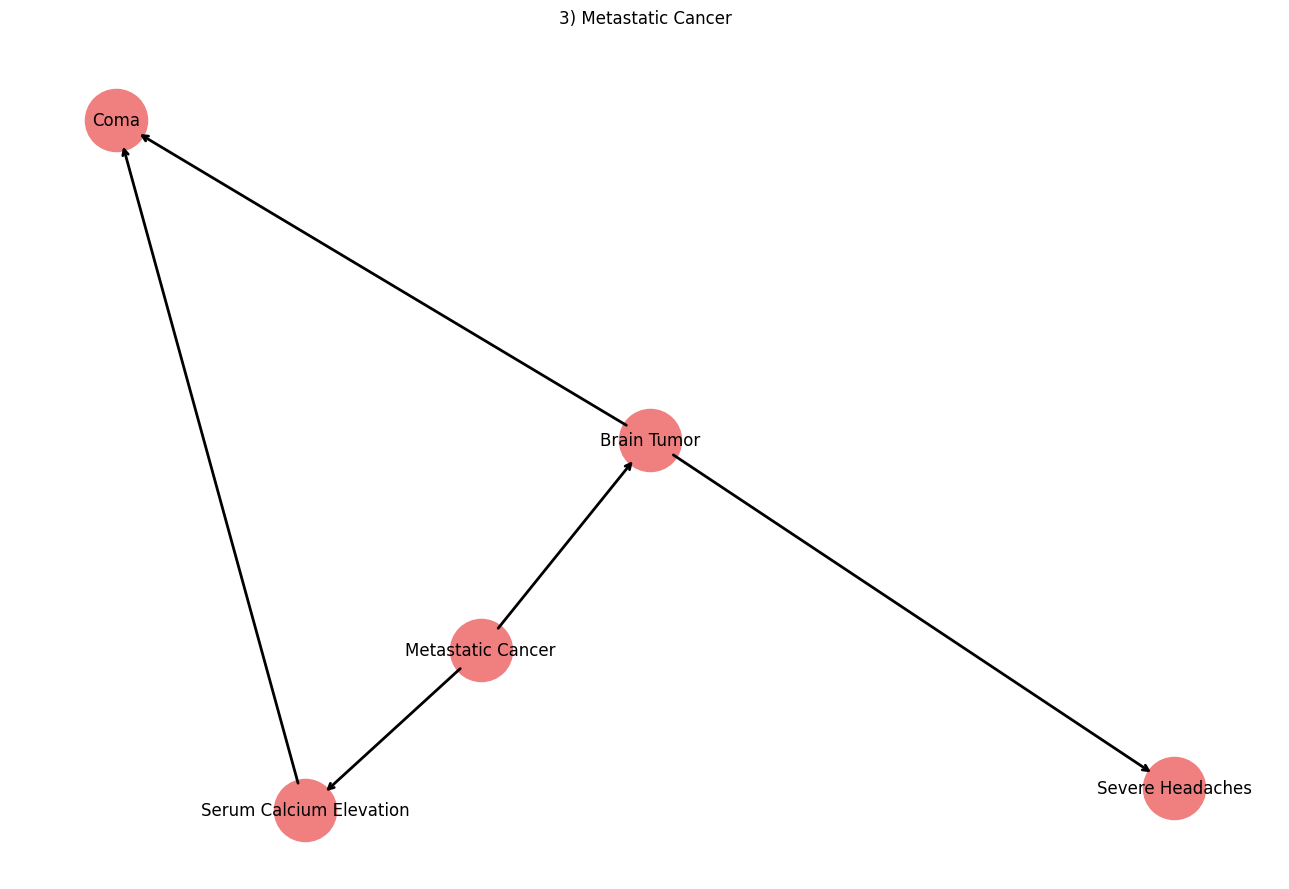

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Metastatic Cancer",
    "Serum Calcium Elevation",
    "Brain Tumor",
    "Coma",
    "Severe Headaches"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Metastatic Cancer", "Serum Calcium Elevation"),
    ("Metastatic Cancer", "Brain Tumor"),
    ("Serum Calcium Elevation", "Coma"),
    ("Brain Tumor", "Coma"),
    ("Brain Tumor", "Severe Headaches")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightcoral")
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=20, shrinkB=20),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("3) Metastatic Cancer", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


4. A patient's dyspnea may be due to, among other causes, tuberculosis, lung cancer, or bronchitis. The fact that the patient has recently been to Asia increases the likelihood that he or she will suffer from tuberculosis, and the fact that he or she is a smoker is a risk factor for both lung cancer and bronchitis. A positive X-ray result indicates the presence of tuberculosis or lung cancer.

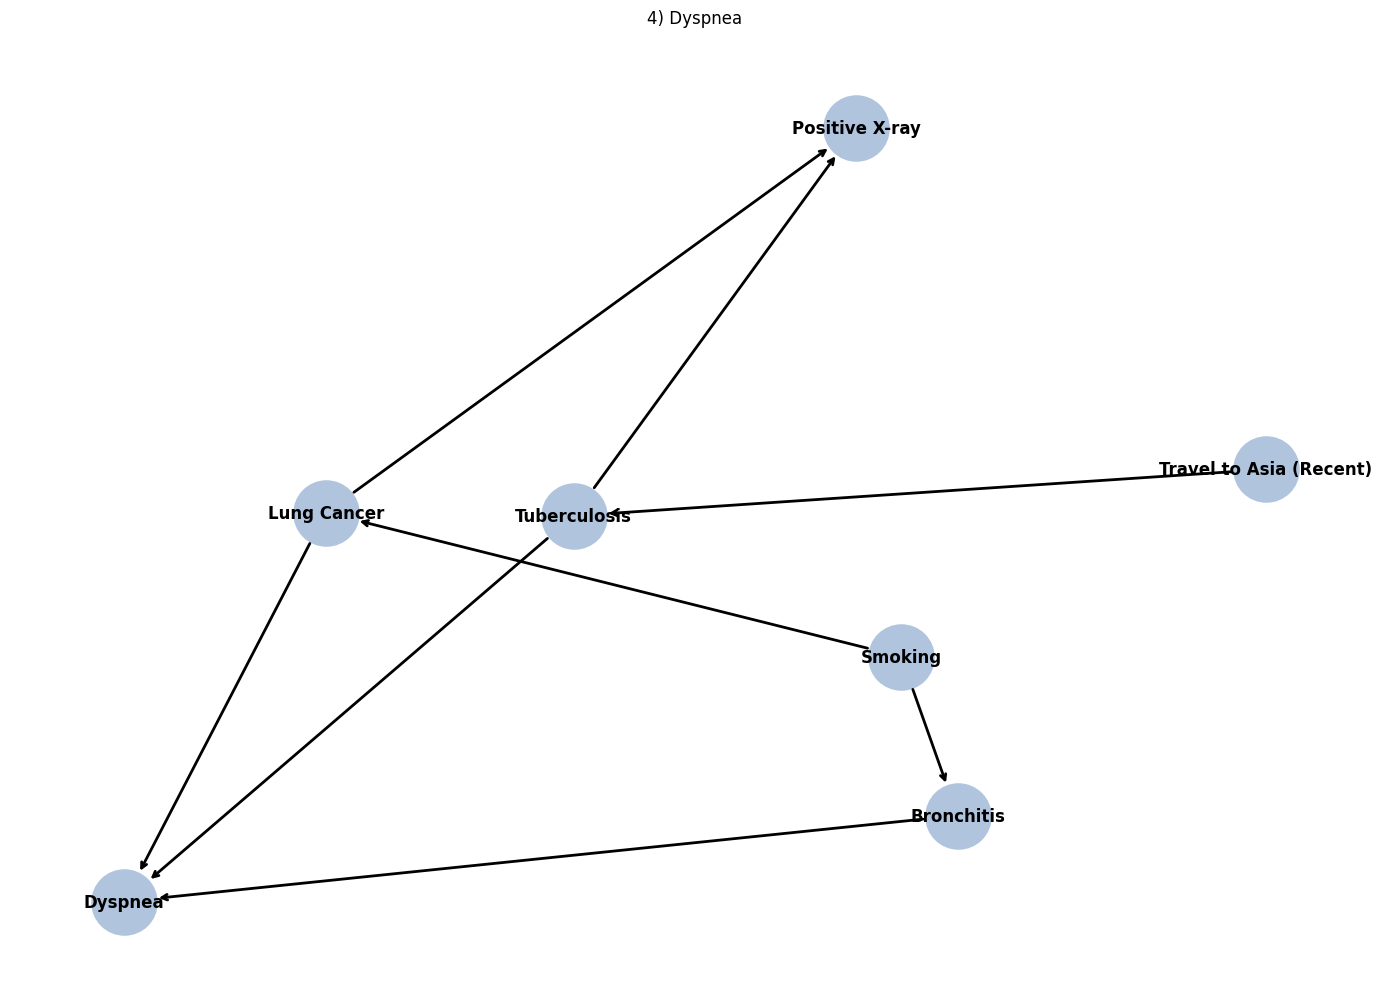

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Travel to Asia (Recent)",
    "Smoking",
    "Tuberculosis",
    "Lung Cancer",
    "Bronchitis",
    "Dyspnea",
    "Positive X-ray"
]
G.add_nodes_from(nodes)

# Add edges for causal relationships
edges = [
    ("Travel to Asia (Recent)", "Tuberculosis"),
    ("Smoking", "Lung Cancer"),
    ("Smoking", "Bronchitis"),
    ("Tuberculosis", "Dyspnea"),
    ("Lung Cancer", "Dyspnea"),
    ("Bronchitis", "Dyspnea"),
    ("Tuberculosis", "Positive X-ray"),
    ("Lung Cancer", "Positive X-ray")
]
G.add_edges_from(edges)

# Plot setup with larger figure and margins
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=13)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color="lightsteelblue")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=25, shrinkB=25),
    )

# Adjust margins to ensure visibility
plt.margins(0.1)
plt.title("4) Dyspnea", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

## Exercise 3.2

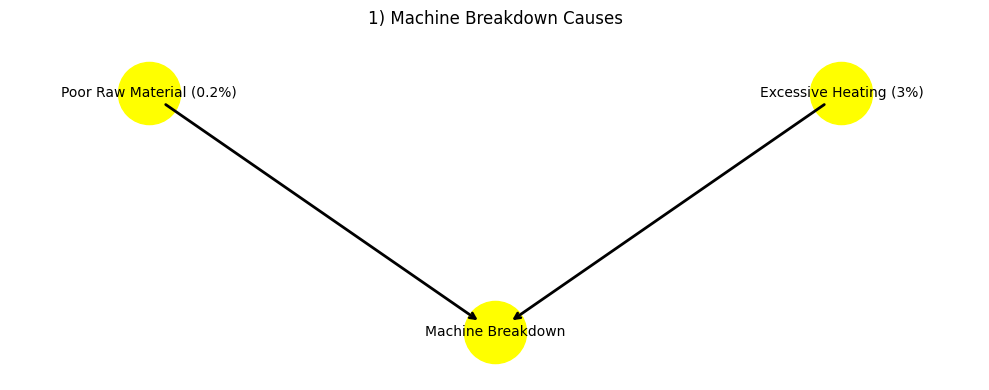

In [40]:
# Create a directed graph (Bayesian network)
G = nx.DiGraph()

# Add nodes
nodes = [
    "Poor Raw Material (0.2%)",
    "Excessive Heating (3%)",
    "Machine Breakdown"
]
G.add_nodes_from(nodes)

# Add edges for the Bayesian network structure
edges = [
    ("Poor Raw Material (0.2%)", "Machine Breakdown"),
    ("Excessive Heating (3%)", "Machine Breakdown")
]
G.add_edges_from(edges)

# Plot setup
plt.figure(figsize=(10, 4))
pos = {
    "Poor Raw Material (0.2%)": (-1, 0),
    "Excessive Heating (3%)": (1, 0),
    "Machine Breakdown": (0, -1)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="yellow")
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw arrows with shrink to avoid overlap
ax = plt.gca()
for source, target in G.edges():
    ax.annotate(
        "",
        xy=pos[target],
        xytext=pos[source],
        arrowprops=dict(arrowstyle="->", lw=2, shrinkA=15, shrinkB=15),
    )

# Title and layout adjustments
plt.title("1) Machine Breakdown Causes", pad=15)
plt.margins(0.2)
plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
from pgmpy.models import DiscreteBayesianNetwork 
from pgmpy.factors.discrete import TabularCPD

# Define the model structure
# (Poor Quality, Excessive Heating) -> Failure
model = DiscreteBayesianNetwork([('PQ', 'F'), ('EH', 'F')])

# Define Conditional Probability Distributions (CPDs)

# CPD for Poor Quality (PQ)
# P(PQ='poor') = 0.002, P(PQ='good') = 0.998
# States: 0 for 'good', 1 for 'poor'
cpd_pq = TabularCPD(variable='PQ', variable_card=2,
                    values=[[0.998], [0.002]],
                    state_names={'PQ': ['good', 'poor']})

# CPD for Excessive Heating (EH)
# P(EH='excessive') = 0.03, P(EH='normal') = 0.97
# States: 0 for 'normal', 1 for 'excessive'
cpd_eh = TabularCPD(variable='EH', variable_card=2,
                    values=[[0.97], [0.03]],
                    state_names={'EH': ['normal', 'excessive']})

# CPD for Failure (F) based on Noisy-OR calculations
# P(F='yes' | PQ, EH)
# PQ states: good (0), poor (1)
# EH states: normal (0), excessive (1)
# F states: no (0), yes (1)

# Order of evidence (parents) in columns for pgmpy:
# (PQ=good, EH=normal), (PQ=good, EH=excessive), (PQ=poor, EH=normal), (PQ=poor, EH=excessive)

# P(F='yes' | PQ=good, EH=normal) = 0.0001
# P(F='yes' | PQ=good, EH=excessive) = 0.020098
# P(F='yes' | PQ=poor, EH=normal) = 0.080092
# P(F='yes' | PQ=poor, EH=excessive) = 0.09849016

cpd_f_values = [
    [0.9999,   0.979902, 0.919908, 0.90150984],  # F='no'
    [0.0001,   0.020098, 0.080092, 0.09849016]   # F='yes'
]

cpd_f = TabularCPD(variable='F', variable_card=2,
                   values=cpd_f_values,
                   evidence=['PQ', 'EH'],
                   evidence_card=[2, 2],
                   state_names={'F': ['no', 'yes'],
                                'PQ': ['good', 'poor'],
                                'EH': ['normal', 'excessive']})

# Add CPDs to the model
model.add_cpds(cpd_pq, cpd_eh, cpd_f)

# Check if the model is valid
if model.check_model():
    print("Model is valid.")
else:
    print("Model is not valid. Issues:")
    print(model.get_latest_warnings())

# Print the CPD for Failure
print("\nCPD for Failure (F):")
print(model.get_cpds('F'))

# --- Optional: Using pgmpy's NoisyOrCPD ---
# pgmpy also has a NoisyOrCPD class that can simplify this for Noisy-OR models.
# The 'inhibitor_probability' for a parent X_i is P(F=0 | X_i=1, all other parents X_j=0, Leak=0)
# which is 1 - p_X_i_fail.
# p_Q_fail = 0.08 --> inhibitor_prob_Q = 1 - 0.08 = 0.92
# p_H_fail = 0.02 --> inhibitor_prob_H = 1 - 0.02 = 0.98
# The 'leak_probability' in NoisyOrCPD is P(F=1 | all parents X_i=0) = p_O_fail = 0.0001

# Note: pgmpy's NoisyOrCPD defines inhibitor_probability as the probability that the
# parent *fails* to cause the effect.
# However, the documentation and examples for `NoisyOrCPD` sometimes refer to
# `inhibitor_probability` as the probability of failure caused by that parent
# (i.e., `p_X_fail`). Let's use the definition that `inhibitor_probability` are the
# `q_i` values, where P(Y=1 | X_i=1, other_X=0, Leak=0) = q_i.
# And leak_probability is P(Y=1 | all X_i=0).

# Correct parameters for NoisyOrCPD based on pgmpy's expected definition:
# inhibitor_probability = [P(F=1|PQ=1, EH=0, Leak=0), P(F=1|PQ=0, EH=1, Leak=0)]
# which are our p_Q_fail and p_H_fail respectively.

print("\n--- Using pgmpy.factors.discrete.NoisyOrCPD for comparison ---")
from pgmpy.factors.discrete import NoisyORCPD

# Note: The `inhibitor_probability` parameter in `NoisyOrCPD` directly takes the
# probability that the respective parent *causes* the child variable to be in state 1,
# assuming other parents are in state 0 and there's no leak.
# These are our p_Q_fail and p_H_fail.
# The `leak_probability` is P(F=1 | PQ=0, EH=0), which is p_O_fail.

cpd_f_noisy_or = NoisyORCPD(
    variable='F',
    evidence=['PQ', 'EH'],
    evidence_card=[2, 2],
    inhibitor_probability=[0.08, 0.02],
    leak_probability=0.0001,
    state_names={'F': ['no', 'yes'],
                'PQ': ['good', 'poor'],
                'EH': ['normal', 'excessive']}
)

# Create a new model to test the NoisyOrCPD
model_noisy = DiscreteBayesianNetwork ([('PQ', 'F'), ('EH', 'F')])
model_noisy.add_cpds(cpd_pq, cpd_eh, cpd_f_noisy_or)

if model_noisy.check_model():
    print("\nNoisyOR Model is valid.")
    print("\nCPD for Failure (F) using NoisyOrCPD class:")
    print(model_noisy.get_cpds('F'))
else:
    print("\nNoisyOR Model is not valid. Issues:")
    print(model_noisy.get_latest_warnings())


Model is valid.

CPD for Failure (F):
+--------+------------+---------------+------------+---------------+
| PQ     | PQ(good)   | PQ(good)      | PQ(poor)   | PQ(poor)      |
+--------+------------+---------------+------------+---------------+
| EH     | EH(normal) | EH(excessive) | EH(normal) | EH(excessive) |
+--------+------------+---------------+------------+---------------+
| F(no)  | 0.9999     | 0.979902      | 0.919908   | 0.90150984    |
+--------+------------+---------------+------------+---------------+
| F(yes) | 0.0001     | 0.020098      | 0.080092   | 0.09849016    |
+--------+------------+---------------+------------+---------------+

--- Using pgmpy.factors.discrete.NoisyOrCPD for comparison ---


TypeError: NoisyORCPD.__init__() got an unexpected keyword argument 'evidence_card'